## 1. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)
  
#read from google drive
df=pd.read_csv('Please_purchase_the_material')
  
print(df.shape)
print(df.head(10))

(316200, 6)
  country  age  new_user  source  total_pages_visited  converted
0      UK   25         1     Ads                    1          0
1      US   23         1     Seo                    5          0
2      US   28         1     Seo                    4          0
3   China   39         1     Seo                    5          0
4      US   30         1     Seo                    6          0
5      US   31         0     Seo                    1          0
6   China   27         1     Seo                    4          0
7      US   23         0     Ads                    4          0
8      UK   29         0  Direct                    4          0
9      US   25         0     Ads                    2          0


## 2. Data Cleaning

In [3]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [4]:
print("There are %d cases with age larger than 100, which are outliers." % sum(df['age']>100))

There are 2 cases with age larger than 100, which are outliers.


In [5]:
#Remove two cases with age larger than 10.
df = df[df['age'] <= 80]
print(df.shape)

(316198, 6)


## 3. Exploratory Data Analysis

In [6]:
print(df.dtypes)

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object


According to the output above, we have 5 features and 1 target variable. The target variable is a binary variable whose values are either 0 or 1. The 5 features include 3 categorical variables (i.e., country, new_users, source), and 2 numeric variables (i.e., age, total_pages_visited).

### 3.1 Conversion Rate

converted
0    306000
1     10198
Name: converted, dtype: int64
Current conversion rate is 3.2%.


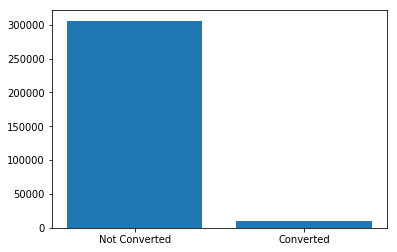

In [7]:
plt.bar(['Not Converted', 'Converted'], df.groupby('converted')['converted'].count())
print(df.groupby('converted')['converted'].count())
print("Current conversion rate is %0.1f%%." % (100*sum(df['converted']==1)/len(df)))

### 3.2 Country 

Coversion rate of UK is 5.3%.
Coversion rate of US is 3.8%.
Coversion rate of China is 0.1%.
Coversion rate of Germany is 6.2%.


C:\Users\Yiling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


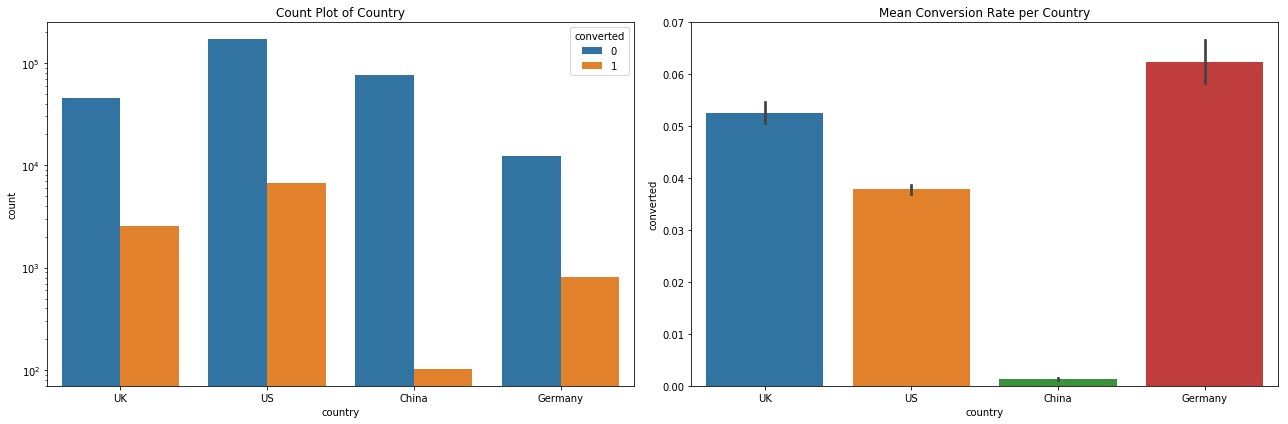

In [8]:
import seaborn as sns

for ctrn in df['country'].unique():
    print("Coversion rate of %s is %0.1f%%." % (ctrn, (100*len(df[(df['converted']==1) & (df['country']==ctrn)])/len(df[df['country']==ctrn]))))
    
grouped = df.groupby('country')['country', 'converted'].mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Country')
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=df, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country')
plt.tight_layout()
plt.show()


Over half of users are from US. And then China, UK and Germany splits the rest part. Germany has the highest conversion rate, 6.2%, which is higher than the industry standard. UK's conversion rate is also higher than the standard. US's conversion rate is just about the standard. China has the lowest conversion rate. Since there are about one quarter of customers from China, figuring out how to improve their conversion rate will definitely improve the overal conversion rate. 
-- **Customer Segment: China**

### 3.3 User Type

C:\Users\Yiling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


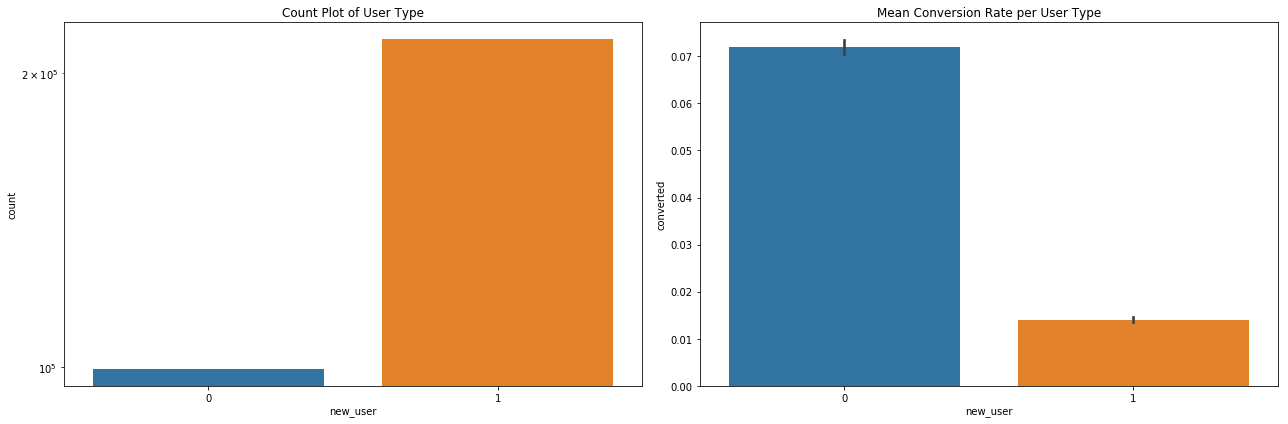

Percentage of new users is 68.5%.
Conversion rate of new_user is 1.4%.
Conversion rate of return_user is 7.2%.


In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', data=df, ax=ax[0])
ax[0].set_title('Count Plot of User Type')
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=df, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per User Type')
plt.tight_layout()
plt.show()

print('Percentage of new users is %0.1f%%.' % (100*len(df[df['new_user']==1])/len(df)))

for idx in df['new_user'].unique():
    if idx == 0:
        user = 'return_user'
    else:
        user = 'new_user'
    print("Conversion rate of %s is %0.1f%%." % (user,\
                                                 (100*len(df[(df['converted']==1) & (df['new_user']==idx)])/len(df[df['new_user']==idx])))) 

Conversion rates of returned customers are much higher than new customers. However, 68.5% customers are new customers. Therefore, we may need to investigate why new users have lower conversion rate.

### 3.4 Source

Conversion rate of Ads is 3.4%.
Conversion rate of Seo is 3.3%.
Conversion rate of Direct is 2.8%.


C:\Users\Yiling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


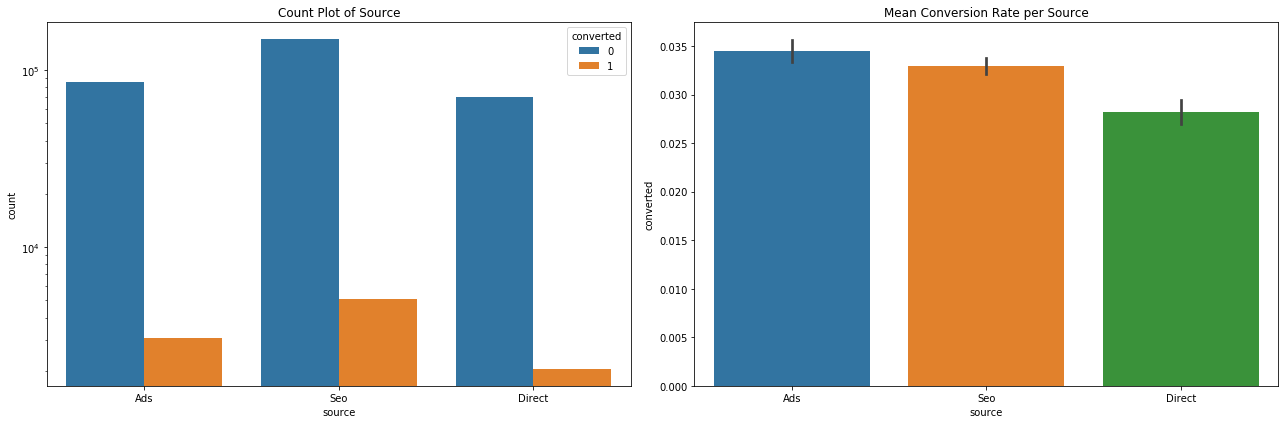

In [10]:
for source in df['source'].unique():
    print("Conversion rate of %s is %0.1f%%." % (source,\
                                                 (100*len(df[(df['converted']==1) & (df['source']==source)])/len(df[df['source']==source]))))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Source')
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=df, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Source')
plt.tight_layout()
plt.show()


Conversion rates between three different sources are close to each other.

### 3.5 Age

C:\Users\Yiling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


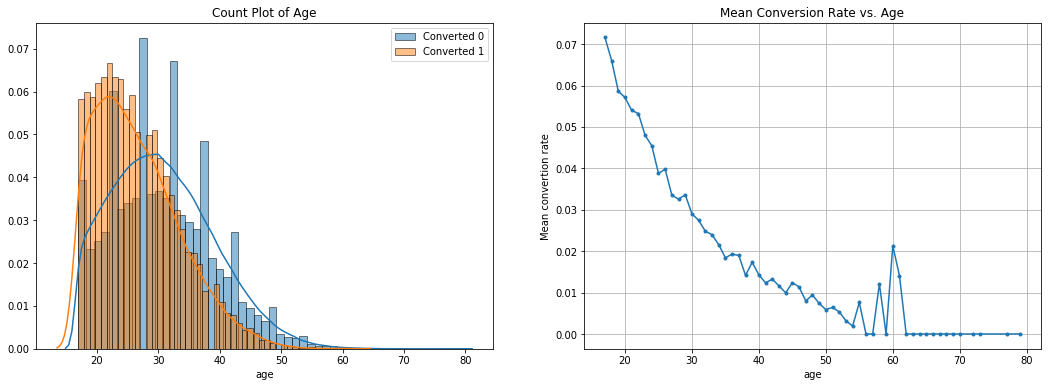

In [11]:
grouped = df[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.5}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted']==0]['age'], label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted']==1]['age'], label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age')
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age')
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

The histogram of age illustrates that there is no significant difference between the distribution of converted customers and that of non-converted customers. And most of users are younger than 50 years old. We can observe that the younger the customers, the higher the conversion rate. **There are a few jumping points between 60 years old, which might be outliers or people in this age range truly have higher conversion rate. Further investigation is required to make this clear.**

In [35]:
#Create a new variable, age_group, to categorize customers based on their ages
df['age_group']=pd.cut(df['age'],range(0, 90, 10))
print(df.head())

  country  age  new_user source  total_pages_visited  converted age_group
0      UK   25         1    Ads                    1          0  (20, 30]
1      US   23         1    Seo                    5          0  (20, 30]
2      US   28         1    Seo                    4          0  (20, 30]
3   China   39         1    Seo                    5          0  (30, 40]
4      US   30         1    Seo                    6          0  (20, 30]


Conversion rate of (20, 30] is 4.0%.
Conversion rate of (30, 40] is 2.1%.
Conversion rate of (40, 50] is 1.1%.
Conversion rate of (10, 20] is 6.3%.
Conversion rate of (50, 60] is 0.5%.
Conversion rate of (60, 70] is 0.4%.
Conversion rate of (70, 80] is 0.0%.


C:\Users\Yiling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Conversion Rate per Age Group')

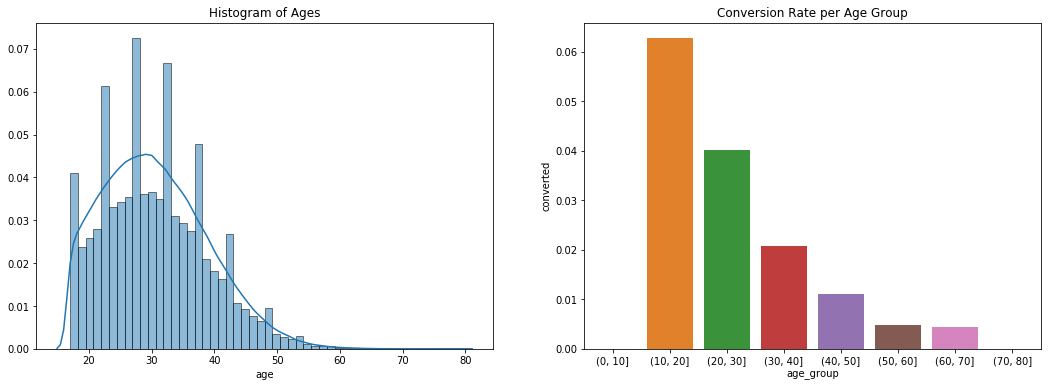

In [44]:
for age_group in df['age_group'].unique():
    print("Conversion rate of %s is %0.1f%%." % (age_group,\
                                                 (100*len(df[(df['converted']==1) & (df['age_group']==age_group)])/len(df[df['age_group']==age_group]))))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df['age'], ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of Ages')
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.5}
cv_rate = df.groupby('age_group')['converted'].mean().reset_index()
sns.barplot(x="age_group", y="converted", data=cv_rate, ax=ax[1])
ax[1].set_title('Conversion Rate per Age Group')

**The younger the customer, the higher the conversion rate.** The histogram of age shows that the majority of customers are between 20 and 40. In other words, even though there are a lot of customers in age group (30 to 40], their conversion rate is relatively low. Therefore, we may need to seek for improvement in this segment of customers, in order to boost current conversion rate. -- **Customer Segment: Age Group (30, 40]**

### 3.6 Total Pages Visted

C:\Users\Yiling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


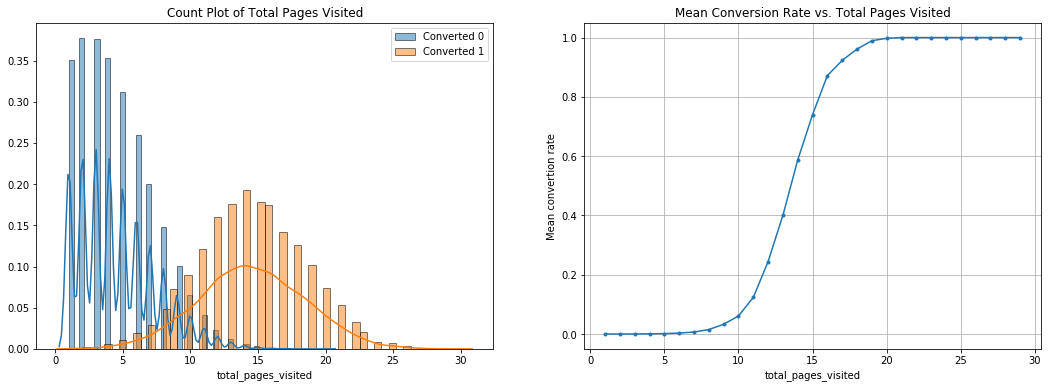

In [12]:
grouped = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.5}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted']==0]['total_pages_visited'], label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted']==1]['total_pages_visited'], label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Total Pages Visited')
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total Pages Visited')
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

According to the histogram on the left, the distributions of total pages visited between converted users and non-converted users are dramatically different. The conversion rate increases dramatically after users visit more than 10 pages. And when the total number of pages is larger than 20, the conversion is ensured. **Therefore, one way to increase conversion rate is to increase the number pages visited. Meanwhile, we need to figure out why customers leave after visiting less than 5 pages.**

### 3.7 Relationships between Variables

#### 3.7.1 Age

C:\Users\Yiling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecate

Text(0.5,1,'Scatter Plot of Age vs. Total Pages Visited')

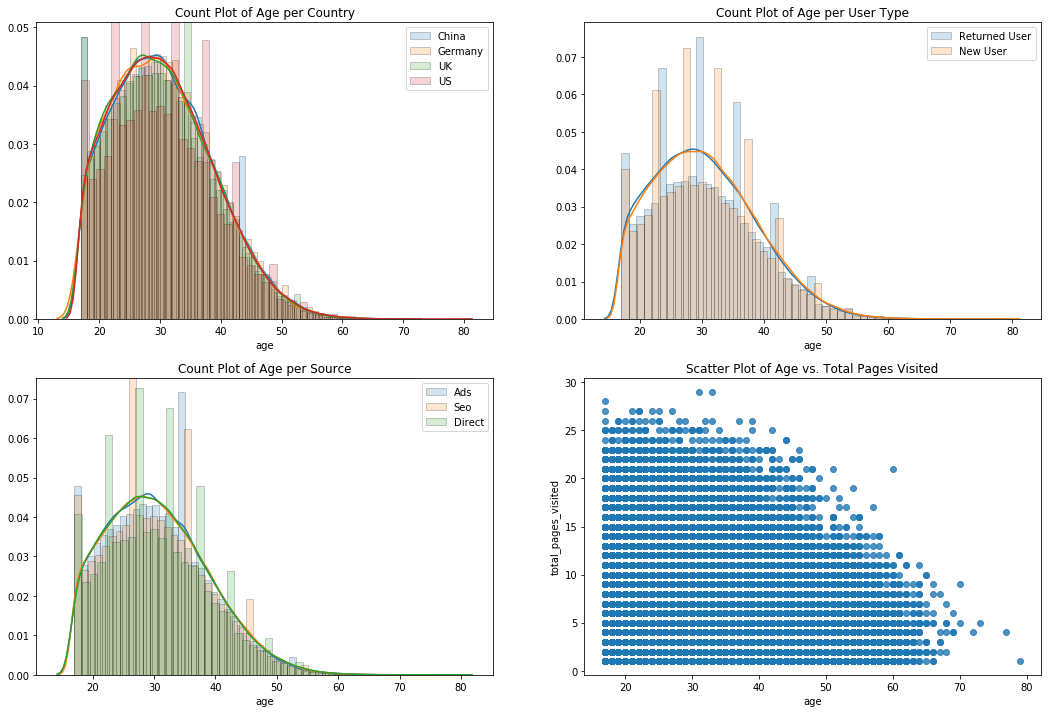

In [13]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.distplot(df[df['country']=='China']['age'], label='China', ax=ax[0,0], hist_kws=hist_kws)
sns.distplot(df[df['country']=='Germany']['age'], label='Germany', ax=ax[0,0], hist_kws=hist_kws)
sns.distplot(df[df['country']=='UK']['age'], label='UK', ax=ax[0,0], hist_kws=hist_kws)
sns.distplot(df[df['country']=='US']['age'], label='US', ax=ax[0,0], hist_kws=hist_kws)
ax[0,0].set_title('Count Plot of Age per Country')
ax[0,0].legend()

sns.distplot(df[df['new_user']==0]['age'], label='Returned User', ax=ax[0,1], hist_kws=hist_kws)
sns.distplot(df[df['new_user']==1]['age'], label='New User', ax=ax[0,1], hist_kws=hist_kws)
ax[0,1].set_title('Count Plot of Age per User Type')
ax[0,1].legend()

sns.distplot(df[df['source']=='Ads']['age'], label='Ads', ax=ax[1,0], hist_kws=hist_kws)
sns.distplot(df[df['source']=='Seo']['age'], label='Seo', ax=ax[1,0], hist_kws=hist_kws)
sns.distplot(df[df['source']=='Direct']['age'], label='Direct', ax=ax[1,0], hist_kws=hist_kws)
ax[1,0].set_title('Count Plot of Age per Source')
ax[1,0].legend()

sns.regplot(x=df['age'],y=df['total_pages_visited'], ax=ax[1,1], fit_reg=False)
ax[1,1].set_title('Scatter Plot of Age vs. Total Pages Visited')

According to the graphs above, the distributions of age among different coutries, user types and sources are very similar to each other. **For ages,  younger customers tend to visit more pages compared to older people.**

#### 3.7.2 Total Pages Visited

C:\Users\Yiling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yiling\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecate

Text(0.5,1,'Scatter Plot of Total Pages Visited vs. Age')

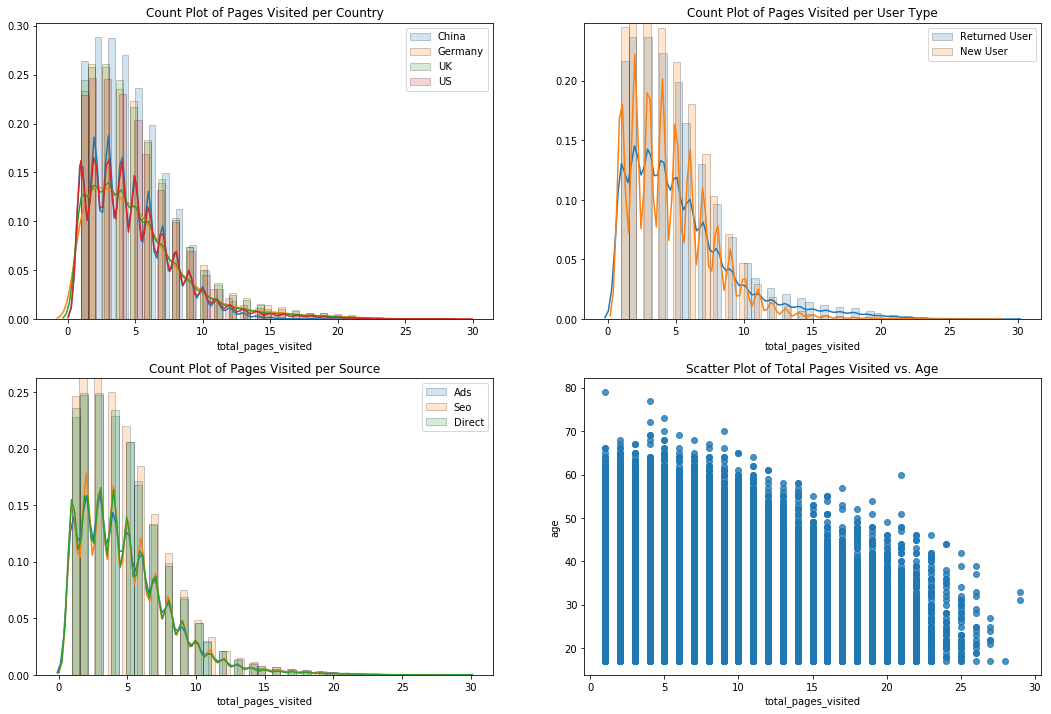

In [265]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.distplot(df[df['country']=='China']['total_pages_visited'], label='China', ax=ax[0,0], hist_kws=hist_kws)
sns.distplot(df[df['country']=='Germany']['total_pages_visited'], label='Germany', ax=ax[0,0], hist_kws=hist_kws)
sns.distplot(df[df['country']=='UK']['total_pages_visited'], label='UK', ax=ax[0,0], hist_kws=hist_kws)
sns.distplot(df[df['country']=='US']['total_pages_visited'], label='US', ax=ax[0,0], hist_kws=hist_kws)
ax[0,0].set_title('Count Plot of Pages Visited per Country')
ax[0,0].legend()

sns.distplot(df[df['new_user']==0]['total_pages_visited'], label='Returned User', ax=ax[0,1], hist_kws=hist_kws)
sns.distplot(df[df['new_user']==1]['total_pages_visited'], label='New User', ax=ax[0,1], hist_kws=hist_kws)
ax[0,1].set_title('Count Plot of Pages Visited per User Type')
ax[0,1].legend()

sns.distplot(df[df['source']=='Ads']['total_pages_visited'], label='Ads', ax=ax[1,0], hist_kws=hist_kws)
sns.distplot(df[df['source']=='Seo']['total_pages_visited'], label='Seo', ax=ax[1,0], hist_kws=hist_kws)
sns.distplot(df[df['source']=='Direct']['total_pages_visited'], label='Direct', ax=ax[1,0], hist_kws=hist_kws)
ax[1,0].set_title('Count Plot of Pages Visited per Source')
ax[1,0].legend()

sns.regplot(x=df['total_pages_visited'],y=df['age'], ax=ax[1,1], fit_reg=False)
ax[1,1].set_title('Scatter Plot of Total Pages Visited vs. Age')

According to the graphs above, the distributions of total pages visted among different coutries, user types and sources are very similar to each other. **There is a decreasing trend of total pages visited with increasing ages. It means that older people tend to visit fewer pages.** Based on our observation in the previous section, the conversion rate increases when people visit more pages. Therefore, decreasing pages visited might be one of the reasons that conversion rate decreases with age. 

#### 3.7.3 Country

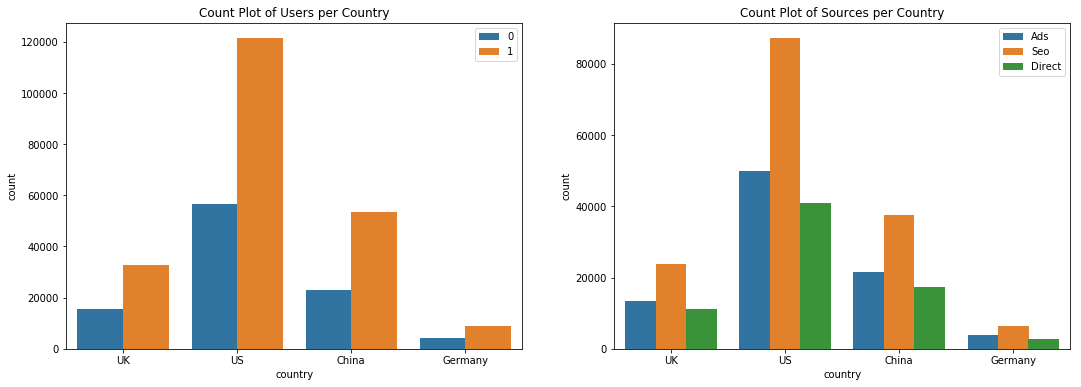

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='new_user', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Users per Country')
ax[0].legend()

sns.countplot(x='country', hue='source', data=df, ax=ax[1])
ax[1].set_title('Count Plot of Sources per Country')
ax[1].legend()

There are no significant difference between new user ratios and distributions of sources among different countries.

#### 3.7.4 Source

[Text(0.5,1,'Count Plot of Sources per Country')]

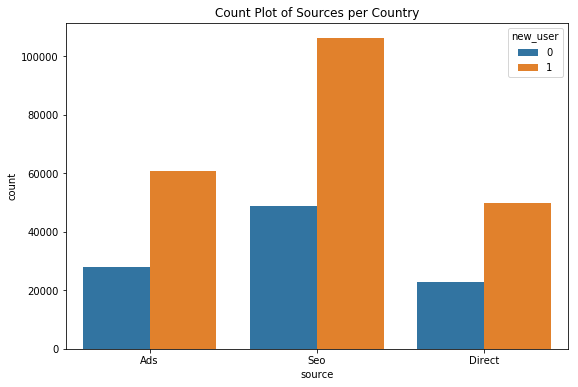

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
sns.countplot(x='source', hue='new_user', data=df).set(title='Count Plot of Sources per Country')

There is no singificant interaction between user type and sources.

## 3. Build ML Model

### 3.1 Split Data into Training and Testing

To handle categorical varaibles, we need to first convert these variables into numberic representations, using one-hot-vector.

In [45]:
df.head()

,country,age,new_user,source,total_pages_visited,converted,age_group
0,UK,25,1,Ads,1,0,"(20, 30]"
1,US,23,1,Seo,5,0,"(20, 30]"
2,US,28,1,Seo,4,0,"(20, 30]"
3,China,39,1,Seo,5,0,"(30, 40]"
4,US,30,1,Seo,6,0,"(20, 30]"


In [46]:
#dummy variables for the categorical ones
df_dummy = pd.get_dummies(df[df.columns[0:5]], drop_first=False)
df_dummy.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummy, df[df.columns[5]],\
                                                    test_size=0.3, random_state=101)
print(X_train.shape, X_test.shape)

(221338, 10) (94860, 10)


Then, we split the data into 70% training set and 30% testing set.

### 3.2 Random Forest

In this project, we select **Random Forest** as our classification model. Because it usually performs well with default parameter settings in classification problems. As a tree-based model, Random Forest is robost with imbalanced data and outliers, and it can handle both continous and categorical variables. Meanwhile, it requires less time to train, comparing with other advanced classification model, such as XGBoosting.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
clf = RandomForestClassifier(n_estimators=100, max_features=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, f1_score
y_pred_train = clf.predict(X_train)
conf = confusion_matrix(y_train, y_pred_train)
print(conf)
print("Accuracy is %0.1f%%" % (100*(conf[0,0]+conf[1,1])/sum(sum(conf))))
print("Recall rate is %0.1f%%" % (100*conf[1,1]/sum(conf[1,:])))
print("F1-Score is %0.2f" % f1_score(y_train, y_pred_train))

[[213521    638]
 [  1939   5240]]
Accuracy is 98.8%
Recall rate is 73.0%
F1-Score is 0.80


In [50]:
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Accuracy is %0.1f%%" % (100*(conf[0,0]+conf[1,1])/sum(sum(conf))))
print("Recall rate is %0.1f%%" % (100*conf[1,1]/sum(conf[1,:])))
print("F1-Score is %0.2f" % f1_score(y_test, y_pred))

[[91369   472]
 [  958  2061]]
Accuracy is 98.5%
Recall rate is 68.3%
F1-Score is 0.74


The training accuracy and F1-score are close to those of testing. This shows that the model does not overfit. Given an imbalance data(3% positive), this high accuracy, 98.5% is not that surprised. Meanwhile, the recall rate tells that we can only detect less than 70% conversions. 

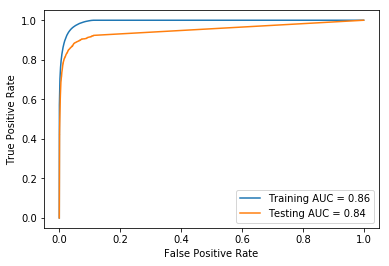

In [52]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
train_plot = plot_roc_curve(clf, X_train, y_train, label='Training AUC = %0.2f'% (roc_auc_score(y_train, y_pred_train)))
test_plot = plot_roc_curve(clf, X_test, y_test,ax=train_plot.ax_, label='Testing AUC = %0.2f' % (roc_auc_score(y_test, y_pred)))
plt.show()

According to the ROC curve above, this model fits the data well, with AUC of 0.95. If we have specific requirements for high accuracy of true positive or tru negative, we may choose different cut-off thresholds to achieve the best solution. However, in this project, this is not relavent to our business problem. Therefore, we use the default threshold, 0.5.

### 3.3 Feature Importance

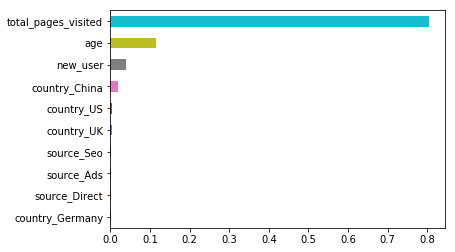

In [53]:
feat_importance = pd.Series(clf.feature_importances_, index = X_train.columns)
feat_importance.sort_values().plot(kind='barh')

**Total_pages_visited is the most important feature among all features.** This is also observed in the previous analysis that there is dramatically increase of conversion rate when customers visit more pages. However, the causality between the number of pages visit and conversion cannot clearly defined by only looking at this data. Because it is possible that customers will make purchase after visitng multiple pages; or customers need to visit multiple pages to complete purchases and transactions. Therefore, in order to have better insights of this problem, we decide to remove this feature and rebuild a random forest classification model.

In [54]:
X_train_rem = X_train.drop(['total_pages_visited'], axis=1)
X_test_rem = X_test.drop(['total_pages_visited'], axis=1)
print(X_train_rem.shape, X_test_rem.shape)
X_train_rem.head()

(221338, 9) (94860, 9)


,age,new_user,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
184481,23,1,0,0,0,1,1,0,0
264375,30,1,1,0,0,0,0,0,1
29417,35,0,0,0,0,1,0,0,1
273142,25,0,0,0,0,1,0,0,1
19929,24,0,0,0,1,0,1,0,0


After removing the most powerful feature and given a unbalanced data, we need to assign weights into two classes. In this way, we can achieve higher predicition probabilities.

In [55]:
clf2 = RandomForestClassifier(n_estimators=100, max_features=3, class_weight={0:1, 1:10})
clf2.fit(X_train_rem, y_train)
y_pred2 = clf2.predict(X_test_rem)

In [56]:
conf2 = confusion_matrix(y_test, y_pred2)
print(conf2)
print("Accuracy is %0.1f%%" % (100*(conf2[0,0]+conf2[1,1])/sum(sum(conf2))))
print("Recall rate is %0.1f%%" % (100*conf2[1,1]/sum(conf2[1,:])))
print("F1-Score is %0.2f" % f1_score(y_test, y_pred2))

[[82963  8878]
 [ 1681  1338]]
Accuracy is 88.9%
Recall rate is 44.3%
F1-Score is 0.20


According to the results above, the accuracy decreases to 88.7%, and the recall rate decreases to 44.6%. However, since our goal is not to get a model with highest accuracy, instead, we would like to have insights about the dataset. Therefore, we will check the feature importance again.

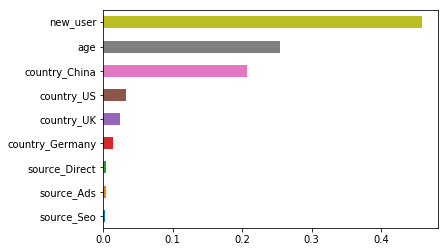

In [57]:
feat_importance2 = pd.Series(clf2.feature_importances_, index=X_train_rem.columns)
feat_importance2.sort_values().plot(kind='barh')

In the new model, we notice that new_user is the most important feature, even more important than age. This observation also matches with the previous analysis that returned customers have higher conversion rate than new users. 

Age is secondly important feature. Younger customers tend to have higher conversion rate. 

The third important feature is country. US, Germany and UK have similar importance weights, which, in other way, means that country_China is a very important feature. This is also observed in the previous analysis that China has lowest conversion rate.

At last, source is the least important feature. This makes sense. In the previous analysis, we have shown that conversion rates of different sources are very similarity to each other.